In [9]:
import pandas as pd
from pathlib import Path
from typing import List

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True  # set this to False if you want PNGs instead of SVGs

In [10]:
def mol_with_index(mol: Chem.rdchem.Mol) -> Chem.rdchem.Mol: 
    for atom in mol.GetAtoms(): 
        atom.SetAtomMapNum(atom.GetIdx())
    return mol 
        

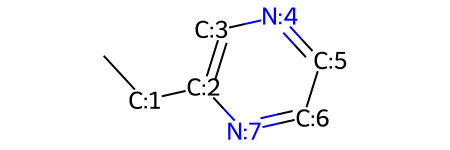

In [18]:
DATA_FOLDER: Path = Path("../data/raw/FreeSolv.csv")
data = pd.read_csv(DATA_FOLDER)
indane = data.loc[data['iupac'] == 'indane']

def molecule_get_smile(df: pd.DataFrame, name_or_id: str | int | List[int]) -> str | List[str]: 
    # Return smile 
    assert df.columns.__contains__('iupac'), "Dataframe must contain columns 'iupac' and 'smiles'."
    if isinstance(name_or_id, int): 
        _id = name_or_id
        return df.iloc[_id]['smiles']
    if isinstance(name_or_id, list): 
        _ids = name_or_id
        return df.iloc[_ids]['smiles'].to_list()
    return df.loc[df['iupac'] == name_or_id]['smiles'].iloc[0]

smiles = molecule_get_smile(data, [1, 2, 3])
mol_with_index(Chem.MolFromSmiles(smiles[2]))

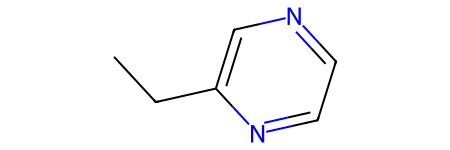

In [26]:
Chem.MolFromSmiles(molecule_get_smile(data, 3))

In [ ]:
def get_atom_features(atom: Chem.rdchem.Atom):
    """Extract features for a single atom."""
    return [
        atom.GetAtomicNum(),            # Atomic number
        atom.GetDegree(),               # Number of bonds
        atom.GetFormalCharge(),         # Charge
        atom.GetHybridization().real,   # Hybridization
        atom.GetIsAromatic(),           # Aromaticity
        atom.GetTotalNumHs(),           # Number of hydrogens
    ]

NameError: name 'Chem' is not defined

In [ ]:
mol = Chem.MolFromSmiles(molecule_get_smile(data, 'benzene'))
for atom in mol.GetAtoms(): 
    print(get_atom_features(atom))
    break

[6, 2, 0, 3, True, 1]


In [46]:
data.head(20)

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
5,"3,5-dimethylphenol",Cc1cc(cc(c1)O)C,-6.27,-5.444
6,"2,3-dimethylbutane",CC(C)C(C)C,2.34,2.468
7,2-methylpentan-2-ol,CCCC(C)(C)O,-3.92,-2.779
8,"1,2-dimethylcyclohexane",C[C@@H]1CCCC[C@@H]1C,1.58,1.685
9,butan-2-ol,CC[C@H](C)O,-4.62,-3.145


In [7]:
import pandas as pd 
from pathlib import Path
from enum import Enum

dataset_path: Path = Path('../data') / 'raw'

dataset_path.rglob("*.csv")

# list([path.name for path in dataset_path.rglob("*.csv")])

class DatasetCSV(str, Enum): 
    ESOL            = "ESOL.csv"
    LIPOPHILICITY   = "Lipophilicity.csv"
    FREESOLV        = 'FreeSolv.csv'
    TOX21           = 'Tox21.csv'

esol = next(dataset_path.rglob("*.csv"))
pd.read_csv(esol, encoding='utf-8')

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C
